In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import sys
from collections import defaultdict, Counter
sb.set()

In [36]:
df = pd.read_csv("D:\Open Classroom\pydatadc_2018-tidy-master\pydatadc_2018-tidy-master\data\country_timeseries.csv")
pd.set_option("display.max_rows", 100)
df.head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [37]:
df = pd.melt(df, id_vars = ["Date", "Day"])
df.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [38]:
dfSplit = df["variable"].str.split("_")
dfSplit.head()

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object

In [39]:
type(dfSplit[0])

list

In [40]:
status = dfSplit.str.get(0)

In [41]:
country = dfSplit.str.get(1)

In [42]:
df["Status"] = status
df["Country"] = country

In [43]:
df["Country"].value_counts()

Senegal         244
Guinea          244
Mali            244
Liberia         244
Spain           244
SierraLeone     244
UnitedStates    244
Nigeria         244
Name: Country, dtype: int64

In [44]:
df.head()

,Date,Day,variable,value,Status,Country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [45]:
#Easiest way for the same approach using split method
#df[["StatusOrg", "CountryOrg"]] = df["variable"].str.split("_", expand = True)
df

,Date,Day,variable,value,Status,Country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [75]:
df = pd.read_csv("D:\Open Classroom\pydatadc_2018-tidy-master\pydatadc_2018-tidy-master\data\pew.csv")
df.head(100)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [76]:
df = pd.melt(df, id_vars = ["religion"],
            var_name = "income", 
            value_name = "value")
df.head()

,religion,income,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


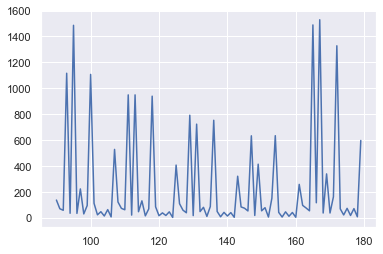

In [49]:
rel = df[["religion", "value"]].head(150)
%matplotlib inline
rel.set_index("religion", inplace = True)
#rel.plot()
relGrp = df.groupby("religion")
cath = relGrp.get_group("Catholic")
relGrp["value"].tail().plot()

In [50]:
df = pd.read_csv("D:\Open Classroom\pydatadc_2018-tidy-master\pydatadc_2018-tidy-master\data\weather.csv")
df.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
dfMelt = pd.melt(df, id_vars = ["id", "year", "month", "element"],
            var_name = "day",
            value_name = "temp").dropna(axis = "index", how = "any")
dfMelt.head(10)

,id,year,month,element,day,temp
20,MX17004,2010,12,tmax,d1,29.9
21,MX17004,2010,12,tmin,d1,13.8
24,MX17004,2010,2,tmax,d2,27.3
25,MX17004,2010,2,tmin,d2,14.4
40,MX17004,2010,11,tmax,d2,31.3
41,MX17004,2010,11,tmin,d2,16.3
46,MX17004,2010,2,tmax,d3,24.1
47,MX17004,2010,2,tmin,d3,14.4
56,MX17004,2010,7,tmax,d3,28.6
57,MX17004,2010,7,tmin,d3,17.5


In [52]:
dfTidy = (dfMelt.pivot_table(index = ["id", "year", "month", "day"],
                            columns = "element",
                            values = "temp")).reset_index()
dfTidy.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
